# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/Pokemon.csv")

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


### 1. How many Legendary Pokemon are there? ( 1pt )


In [4]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [5]:
df['isLegendary'].sum()

46

There are 46 legendary pokemons in the dataset

### 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

In [6]:
df['attack-to-HP ratio'] = df['Attack'] / df['HP']

In [7]:
df.sort_values(['attack-to-HP ratio'], ascending=False).head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,attack-to-HP ratio
291,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,...,False,NaN,Mineral,NaN,False,0.79,1.2,45,head_base,90.000000
49,50,Diglett,Ground,NaN,265,10,55,25,35,45,...,True,0.500,Field,NaN,False,0.20,0.8,255,head_base,5.500000
97,98,Krabby,Water,NaN,325,30,105,90,25,25,...,True,0.500,Water_3,NaN,False,0.41,6.5,225,insectoid,3.500000
385,386,Deoxys,Psychic,NaN,600,50,150,50,150,50,...,False,NaN,Undiscovered,NaN,False,1.70,60.8,3,bipedal_tailless,3.000000
139,140,Kabuto,Rock,Water,355,30,80,90,55,45,...,True,0.875,Water_1,Water_3,False,0.51,11.5,45,insectoid,2.666667


Shedinja is the pokemon with the highest attack to HP ratio

### 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number              721 non-null    int64  
 1   Name                721 non-null    object 
 2   Type_1              721 non-null    object 
 3   Type_2              350 non-null    object 
 4   Total               721 non-null    int64  
 5   HP                  721 non-null    int64  
 6   Attack              721 non-null    int64  
 7   Defense             721 non-null    int64  
 8   Sp_Atk              721 non-null    int64  
 9   Sp_Def              721 non-null    int64  
 10  Speed               721 non-null    int64  
 11  Generation          721 non-null    int64  
 12  isLegendary         721 non-null    bool   
 13  Color               721 non-null    object 
 14  hasGender           721 non-null    bool   
 15  Pr_Male             644 non-null    float64
 16  Egg_Grou

In [9]:
df['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

In [10]:
df['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     27
Steel       19
Fighting    19
Fairy       18
Grass       18
Dark        16
Rock        14
Dragon      14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [11]:
# Make a new column isFireType (true if Type 1 or Type 2 of Pokemon is Fire)
def label_is_fire(row):
    if row['Type_1'] == 'Fire' or row['Type_2'] == 'Fire' :
        return 1
    else:
        return 0

In [12]:
df['is_fire_type'] = df.apply(lambda row: label_is_fire(row), axis=1)

In [13]:
df['is_fire_type'].sum()

56

In [14]:
# Data Cleaning and feature engineering
df.isnull().sum()

Number                  0
Name                    0
Type_1                  0
Type_2                371
Total                   0
HP                      0
Attack                  0
Defense                 0
Sp_Atk                  0
Sp_Def                  0
Speed                   0
Generation              0
isLegendary             0
Color                   0
hasGender               0
Pr_Male                77
Egg_Group_1             0
Egg_Group_2           530
hasMegaEvolution        0
Height_m                0
Weight_kg               0
Catch_Rate              0
Body_Style              0
attack-to-HP ratio      0
is_fire_type            0
dtype: int64

In [15]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'attack-to-HP ratio', 'is_fire_type'],
      dtype='object')

In [16]:
# Make a dataframe solely made out of firetype pokemons
df_firetype1 = df[df['Type_1'] == 'Fire']
df_firetype2 = df[df['Type_2'] == 'Fire']
fire_types = df_firetype2.append(df_firetype1)

In [17]:
fire_types['Catch_Rate'].value_counts()

45     25
3       7
190     6
75      4
90      3
120     3
60      2
65      1
15      1
150     1
220     1
30      1
255     1
Name: Catch_Rate, dtype: int64

In [18]:
# Get dummy variables for categorical features
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'attack-to-HP ratio', 'is_fire_type'],
      dtype='object')

In [19]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'attack-to-HP ratio', 'is_fire_type'],
      dtype='object')

In [20]:
model_df = pd.get_dummies(df, columns = ['Color','Body_Style'])

In [21]:
model_df = model_df.drop(columns=['Body_Style_with_fins', 'Color_Grey', 'isLegendary',])

In [22]:
model_df = model_df.drop(columns=['Number','Name', 'Type_1', 'Type_2', 'hasGender','Generation', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'attack-to-HP ratio' ])

In [23]:
model_df = model_df.drop(columns = ['Egg_Group_1', 'Egg_Group_2'])

In [24]:
model_df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Pr_Male', 'is_fire_type', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Green', 'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_White',
       'Color_Yellow', 'Body_Style_bipedal_tailed',
       'Body_Style_bipedal_tailless', 'Body_Style_four_wings',
       'Body_Style_head_arms', 'Body_Style_head_base', 'Body_Style_head_legs',
       'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings'],
      dtype='object')

In [25]:
# Features to use -> 
from sklearn.preprocessing import StandardScaler
scaled_features = model_df.copy() # create a copy of the df
col_names = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Pr_Male'] # generate a list of column names for values to standardize
features = scaled_features[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head() #df with scaled features 


,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,is_fire_type,Color_Black,...,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings
0,-0.912018,-0.905138,-0.898134,-0.744925,-0.129931,-0.158953,-0.759906,1.609613,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.118133,-0.324426,-0.449306,-0.266721,0.391481,0.396662,-0.209629,1.609613,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.976881,0.449857,0.241197,0.416427,1.086697,1.137482,0.524073,1.609613,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.994145,-1.137423,-0.794558,-0.949869,-0.303735,-0.714567,-0.026204,1.609613,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.118133,-0.401854,-0.380256,-0.437508,0.391481,-0.158953,0.524073,1.609613,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
scaled_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total                        721 non-null    float64
 1   HP                           721 non-null    float64
 2   Attack                       721 non-null    float64
 3   Defense                      721 non-null    float64
 4   Sp_Atk                       721 non-null    float64
 5   Sp_Def                       721 non-null    float64
 6   Speed                        721 non-null    float64
 7   Pr_Male                      644 non-null    float64
 8   is_fire_type                 721 non-null    int64  
 9   Color_Black                  721 non-null    uint8  
 10  Color_Blue                   721 non-null    uint8  
 11  Color_Brown                  721 non-null    uint8  
 12  Color_Green                  721 non-null    uint8  
 13  Color_Pink          

In [27]:
# Generate X and Y values
X = scaled_features.drop(columns=['is_fire_type', 'Pr_Male']).values
y = scaled_features.iloc[:, 8].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) #tried stratifying to preserve the ratio of target variables


In [29]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))


Accuracy: 0.8525345622119815
Precision: 0.3170731707317073
Recall: 0.7647058823529411


<AxesSubplot:>

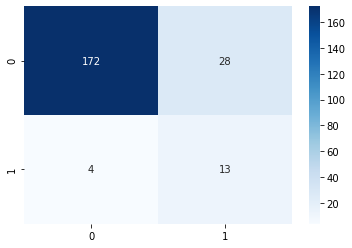

In [30]:
# Visualizing the Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')


In [31]:
# Visualizing Precision, Recall and F1 scores for each class
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test,predictions,output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.977273,0.317073,0.852535,0.647173,0.925552
recall,0.860000,0.764706,0.852535,0.812353,0.852535
f1-score,0.914894,0.448276,0.852535,0.681585,0.878338
support,200.000000,17.000000,0.852535,217.000000,217.000000


Looking at the clasification report, for the target variable (is_fire_type): we have generally low precision and high recall i.e. this is a bad model

### 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

In [32]:
legend_df = df[df['isLegendary'] == 1]

In [33]:
legend_df.head(3)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,attack-to-HP ratio,is_fire_type
143,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,NaN,Undiscovered,NaN,False,1.70,55.4,3,two_wings,0.944444,0
144,145,Zapdos,Electric,Flying,580,90,90,85,125,90,...,NaN,Undiscovered,NaN,False,1.60,52.6,3,two_wings,1.000000,0
145,146,Moltres,Fire,Flying,580,90,100,90,125,85,...,NaN,Undiscovered,NaN,False,2.01,60.0,3,two_wings,1.111111,1


In [34]:
df['Pr_Male'].head(10)

0    0.875
1    0.875
2    0.875
3    0.875
4    0.875
5    0.875
6    0.875
7    0.875
8    0.875
9    0.500
Name: Pr_Male, dtype: float64

In [35]:
#Get continuous variable columns by getting the columns from df.describe()
legend_df.describe().columns

Index(['Number', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed', 'Generation', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'attack-to-HP ratio', 'is_fire_type'],
      dtype='object')

In [36]:
#Remove the unneeded columns
cols_plot = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def',
       'Speed','Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']

0.00    580.0
0.25    580.0
0.50    600.0
0.75    677.5
1.00    720.0
Name: Total, dtype: float64

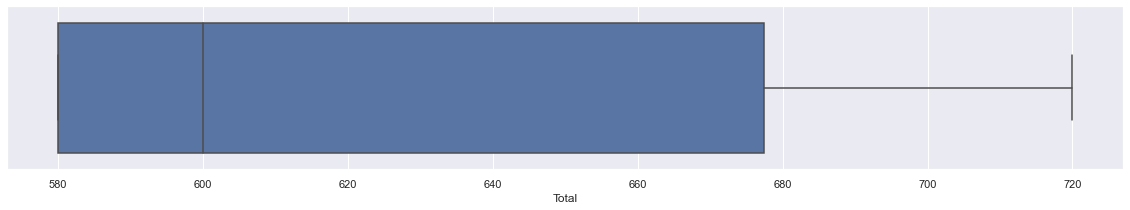

In [37]:
# Get the box plot of each feature ( Would have iterated but will describe each boxplot so opted to plot them one by one)
import seaborn as sns 

sns.set(rc={'figure.figsize':(20,3)})
ax = sns.boxplot(x=legend_df["Total"])
legend_df.Total.quantile([0,0.25,0.5,0.75,1])

# In terms of the Total attribute, the median of the legendaries is 600. Minimum and maximum values are 580 and 720. \
# The IQR is between 580 and 677.5 . No outliers as no values exceeded the whiskers.

0.00     50.00
0.25     80.00
0.50     91.00
0.75    103.75
1.00    150.00
Name: HP, dtype: float64

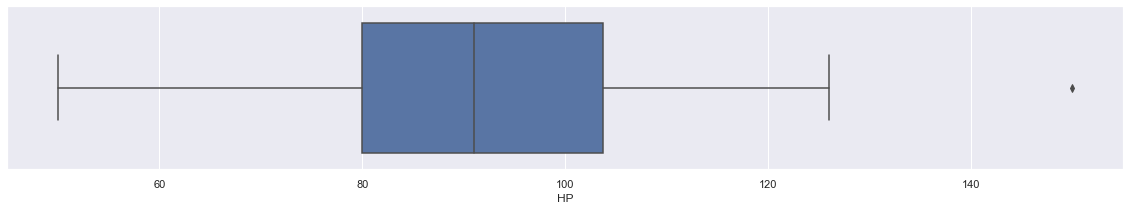

In [38]:

ax = sns.boxplot(x=legend_df["HP"])
legend_df.HP.quantile([0,0.25, 0.50, 0.75,1])

# In terms of HP, the median HP of the legendaries is 91. Minimum and maximum values are 50 and 150. \
# The IQR is between 80 and 103.75 i.e. bulk of Legendaries have HP between these 2 values. One outlier Legendary Pokemon has an HP of 150.

0.00     50.00
0.25     90.00
0.50    107.50
0.75    123.75
1.00    160.00
Name: Attack, dtype: float64

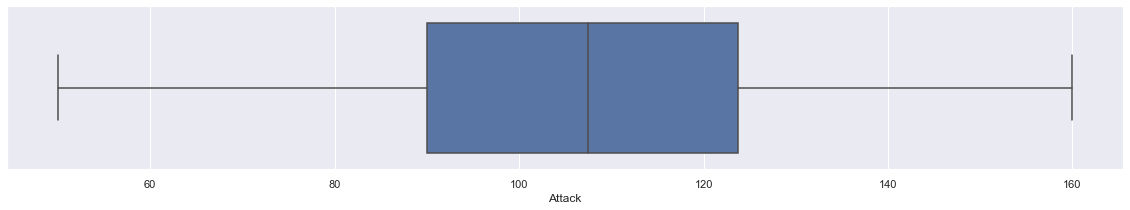

In [39]:

ax = sns.boxplot(x=legend_df["Attack"])
legend_df.Attack.quantile([0,0.25, 0.5,0.75,1])

# In terms of Attack, the median Attack of the legendaries is 107.50. Minimum and maximum values are 50 and 160.00. \
# The IQR is between 90.00 and 123.75 i.e. bulk of Legendaries have Attack between these 2 values. No outliers

0.00     50.00
0.25     90.00
0.50    100.00
0.75    118.75
1.00    200.00
Name: Defense, dtype: float64

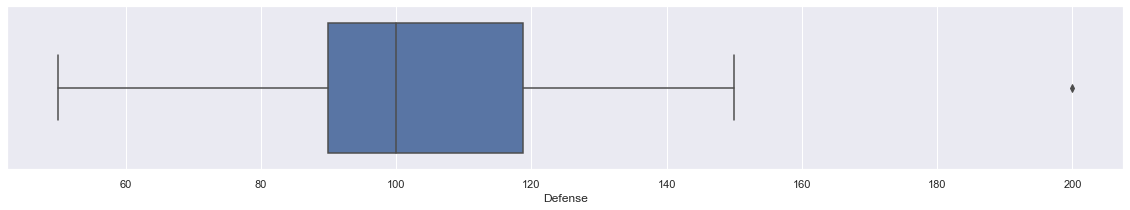

In [40]:

ax = sns.boxplot(x=legend_df["Defense"])
legend_df.Defense.quantile([0,0.25,0.5,0.75,1])
# In terms of Defense, the median Defense of the legendaries is 100.00. Minimum and maximum values are 50 and 200.00. \
# The IQR is between 90.00 and 118.75 i.e. bulk of Legendaries have Defense between these 2 values. One outlier Legendary Pokemon has a Defense of 200.

0.00     50.00
0.25     96.25
0.50    117.50
0.75    130.00
1.00    154.00
Name: Sp_Atk, dtype: float64

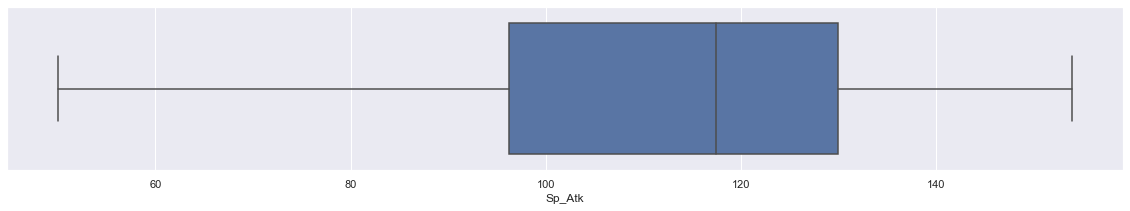

In [41]:

ax = sns.boxplot(x=legend_df["Sp_Atk"])
legend_df.Sp_Atk.quantile([0,0.25,0.5,0.75,1])
# In terms of Sp_Atk, the median Sp_Atk of the legendaries is 117.50. Minimum and maximum values are 50 and 154.00. \
# The IQR is between 96.25 and 130.00 i.e. bulk of Legendaries have Sp_Atk between these 2 values. No outliers

0.00     50.0
0.25     90.0
0.50    100.0
0.75    120.0
1.00    200.0
Name: Sp_Def, dtype: float64

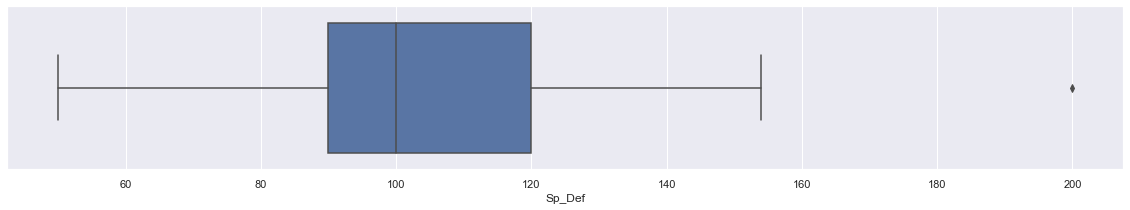

In [42]:

ax = sns.boxplot(x=legend_df["Sp_Def"])
legend_df.Sp_Def.quantile([0,0.25,0.5,0.75,1])
# In terms of Sp_Def, the median Sp_Def of the legendaries is 100.0. Minimum and maximum values are 50 and 200.0. \
# The IQR is between 90.0 and 120.0 i.e. bulk of Legendaries have Sp_Def between these 2 values. One outlier Legendary Pokemon has a Sp_Def of 200.

0.00     50.0
0.25     90.0
0.50     99.0
0.75    108.0
1.00    150.0
Name: Speed, dtype: float64

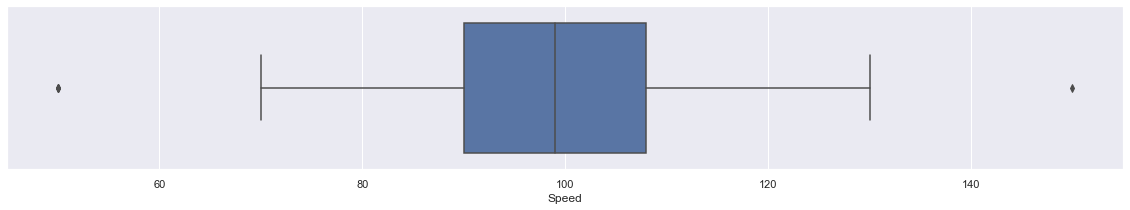

In [43]:

ax = sns.boxplot(x=legend_df["Speed"])
legend_df.Speed.quantile([0,0.25,0.5,0.75,1])
# In terms of Speed, the median Speed of the legendaries is 99.0. Minimum and maximum values are 50 and 150.0. \
# The IQR is between 90.0 and 108.0 i.e. bulk of Legendaries have Speed between these 2 values. 
# One outlier Pokemon below the boxplot whisker has a speed of 50.
# One outlier Pokemon above the boxplot whiskey has a speed of 150.

0.00    0.000
0.25    0.625
0.50    1.000
0.75    1.000
1.00    1.000
Name: Pr_Male, dtype: float64

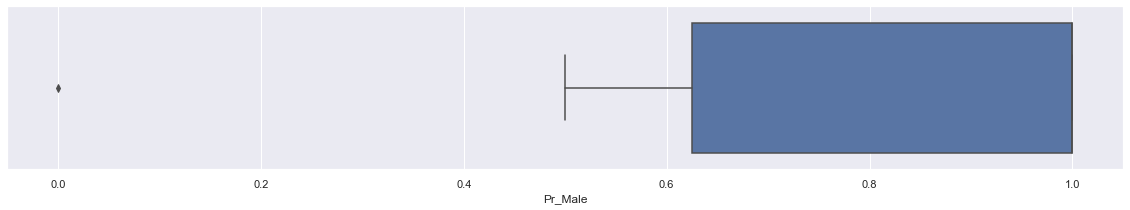

In [44]:

ax = sns.boxplot(x=legend_df["Pr_Male"])
legend_df.Pr_Male.quantile([0,0.25,0.5,0.75,1])
# In terms of Pr_Male, the median Pr_Male of the legendaries is 1.000 i.e. more than half of legendaries are definitely Male. 
# Minimum and maximum values are 0 and 1. 
# The IQR is between 0.625 and 1.000 i.e. bulk of Legendaries have Pr_Male between these 2 values. 
# One outlier Legendary Pokemon has 0 probability of being Male.

0.00    0.20
0.25    1.50
0.50    1.96
0.75    3.20
1.00    7.01
Name: Height_m, dtype: float64

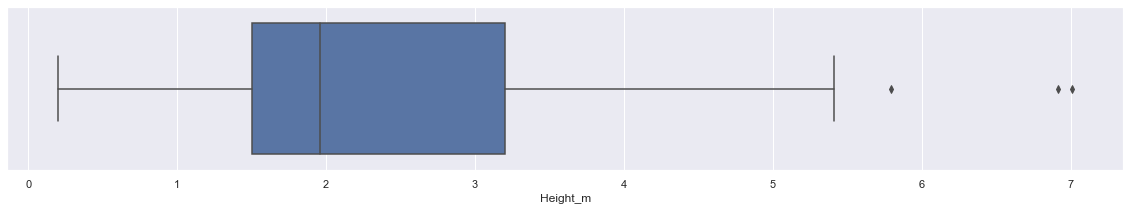

In [45]:

ax = sns.boxplot(x=legend_df["Height_m"])
legend_df.Height_m.quantile([0,0.25,0.5,0.75,1])
# In terms of Height_m, the median Height_m of the legendaries is1.96. Minimum and maximum values are 0.20 and 7.01. \
# The IQR is between 1.50 and 3.20 i.e. bulk of Legendaries have Height_m between these 2 values. 
# Three pokemons have outlier heights greater than the boxplot whiskers

0.00      0.30
0.25     56.55
0.50    196.50
0.75    293.75
1.00    950.00
Name: Weight_kg, dtype: float64

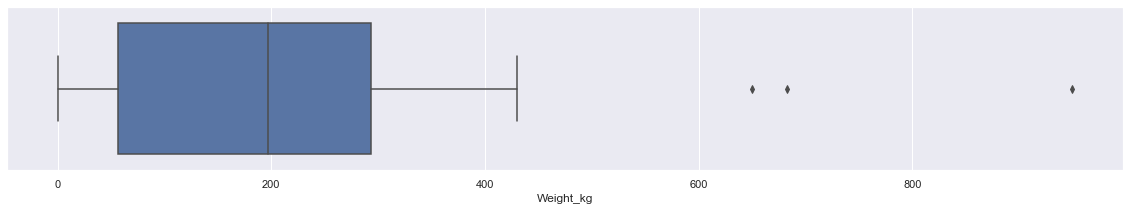

In [46]:
ax = sns.boxplot(x=legend_df["Weight_kg"])
legend_df.Weight_kg.quantile([0,0.25,0.5,0.75,1])
# In terms of Weight_kg, the median Weight_kg of the legendaries is 196.50. Minimum and maximum values are 0.30 and 950.00. \
# The IQR is between 56.55 and 293.75 i.e. bulk of Legendaries have Weight_kg between these 2 values. 
# Three pokemons have outlier weights greater than the boxplot whiskers (maybe these are the three pokemons who have outlier heights?)

0.00     3.0
0.25     3.0
0.50     3.0
0.75     3.0
1.00    45.0
Name: Catch_Rate, dtype: float64

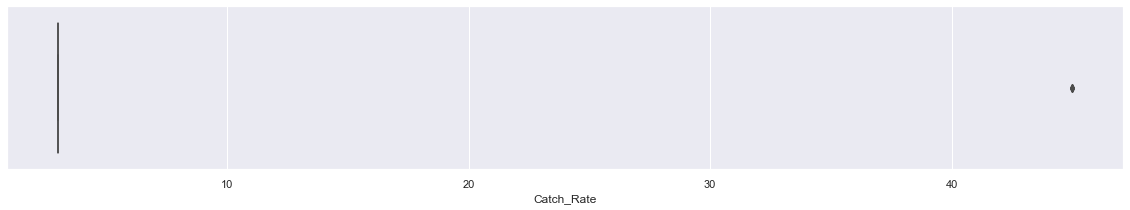

In [47]:

ax = sns.boxplot(x=legend_df["Catch_Rate"])
legend_df.Catch_Rate.quantile([0,0.25,0.5,0.75,1]) #lol there are only 2 values so I guess for the purposes of this dataset, this shouldnt be boxplotted

### 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

In [48]:
# Get the probability from the imbalance-trained logistic regression model
prob =[x[1] for x in logistic_model.predict_proba(X)]
# Output a DF containing pokemon number, name and probability of being a fire type from our trained logistic reg model
df_withprob = df.copy()
df_withprob['prob'] = prob 

df_withprob[['Name', 'is_fire_type','prob']].head(10)

,Name,is_fire_type,prob
0,Bulbasaur,0,0.104104
1,Ivysaur,0,0.121351
2,Venusaur,0,0.145377
3,Charmander,1,0.840050
4,Charmeleon,1,0.882813
5,Charizard,1,0.931889
6,Squirtle,0,0.007842
7,Wartortle,0,0.009068
8,Blastoise,0,0.010622
9,Caterpie,0,0.012082


### 6. What is the accuracy of your model?( 2pts )

In [49]:
accuracy = metrics.accuracy_score(predictions,y_test)
print(accuracy) #however when looking at the precision and recall, it's quite bad due to the low precision score for the target variable

0.8525345622119815


### 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )

In [50]:
scaled_features.drop(columns=['is_fire_type', 'Pr_Male'])

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color_Black,Color_Blue,Color_Brown,...,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings
0,-0.912018,-0.905138,-0.898134,-0.744925,-0.129931,-0.158953,-0.759906,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.118133,-0.324426,-0.449306,-0.266721,0.391481,0.396662,-0.209629,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.976881,0.449857,0.241197,0.416427,1.086697,1.137482,0.524073,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.994145,-1.137423,-0.794558,-0.949869,-0.303735,-0.714567,-0.026204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.118133,-0.401854,-0.380256,-0.437508,0.391481,-0.158953,0.524073,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2.391275,2.230709,1.932931,0.826315,2.164282,1.063400,1.221091,0,0,0,...,0,0,0,0,0,0,0,0,0,1
717,1.661266,1.533854,0.862651,1.714408,0.426242,0.952277,1.074350,0,0,0,...,0,0,0,0,0,0,0,1,0,0
718,1.661266,-0.711567,0.862651,2.704972,1.086697,2.989532,-0.576481,0,0,0,...,1,0,0,0,0,0,0,0,0,0
719,1.661266,0.449857,1.207902,-0.369194,2.824737,2.248712,0.157222,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
# Trying out using oversampled data in both training and test sets

from sklearn.utils import resample

X = scaled_features.drop(columns=['is_fire_type', 'Pr_Male'])
y = scaled_features[['is_fire_type']]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   y, 
                   test_size=0.3,     
                   random_state=42, stratify = y)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_firetype = X[X.is_fire_type==False]
is_firetype = X[X.is_fire_type==True]

# upsample minority
firetype_upsampled = resample(is_firetype,
                          replace=True, # sample with replacement
                          n_samples=len(not_firetype), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
firetype_upsampled = pd.concat([not_firetype, firetype_upsampled])

# check new class counts
firetype_upsampled.is_fire_type.value_counts()

0    465
1    465
Name: is_fire_type, dtype: int64

In [52]:
firetype_upsampled.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Green', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Body_Style_bipedal_tailed', 'Body_Style_bipedal_tailless',
       'Body_Style_four_wings', 'Body_Style_head_arms', 'Body_Style_head_base',
       'Body_Style_head_legs', 'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings', 'is_fire_type'],
      dtype='object')

In [53]:
# Let's try this out 
# Now we have an upsampled dataframe

X_train = firetype_upsampled.drop(columns=['is_fire_type']).values
y_train = firetype_upsampled[['is_fire_type']].values

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)



C:\Users\Patrick\anaconda3\envs\gcash_env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8387096774193549
Precision: 0.29545454545454547
Recall: 0.7647058823529411


,0,1,accuracy,macro avg,weighted avg
precision,0.976879,0.295455,0.83871,0.636167,0.923495
recall,0.845000,0.764706,0.83871,0.804853,0.838710
f1-score,0.906166,0.426230,0.83871,0.666198,0.868567
support,200.000000,17.000000,0.83871,217.000000,217.000000


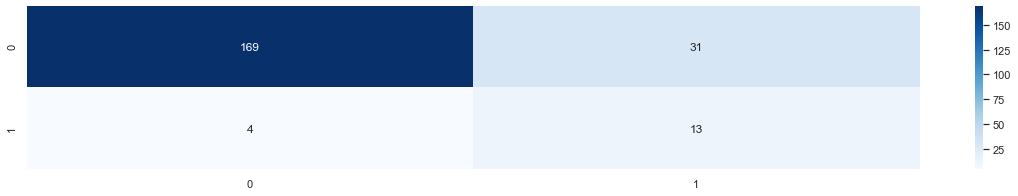

In [55]:
# Nicee precision improved! Let's plot the confusion matrix and precision_score
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
pd.DataFrame(classification_report(y_test,predictions,output_dict=True))

We can notice that the precision and recall rates have improved greatly once we incorporated upsampling. The image below shoes the original precision and recall scores we got from an imbalanced dataset.

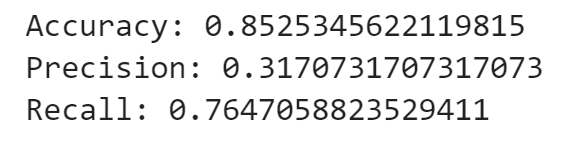

This the Accuracy, Precision and Recall Score that we got after oversampling.

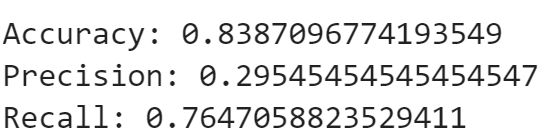

From the results, we can observe that this is not a great model as the performance w/ the test data was not improved after oversampling.

In terms of model performance, we could probably improve this model by using feature selection techniques and hyperparameter tuning. But due to the scope of this lesson, I think that this is a sufficient model in terms of highlighting the value of knowing what to do with imbalanced datasets and binary classification problems using logreg.

In [56]:
# Try using smote
# Trying out using oversampled data in both training and test sets

from imblearn.over_sampling import SMOTE

X = scaled_features.drop(columns=['is_fire_type', 'Pr_Male']).values
y = scaled_features[['is_fire_type']].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)


In [57]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [58]:
logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(x_train_res, y_train_res)
predictions = logistic_model.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

# It seems that the model performed slightly better after using SMOTE as the oversampling method -- The general low precision score
# might be because inherently, the features and hyperparameters used during model building might not be suitable for predicting whether 
# a Pokemon is fire type or not

Accuracy: 0.8847926267281107
Precision: 0.34210526315789475
Recall: 1.0
